# Random Forest
Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes or mean prediction of the individual trees<br>
Random forest is a bagging technique and not a boosting technique. In boosting as the name suggests, one is learning from other which in turn boosts the learning. The trees in random forests are run in parallel. There is no interaction between these trees while building the trees.<br>
Random Forests does not overfit. The testing performance of Random Forests does not decrease (due to overfitting) as the number of trees increases. Hence after certain number of trees the performance tend to stay in a certain value.<br>

# Dataset

Dataset that I am using is about users in social networks. It describes ocial network has several business clients which can put their ads on the social network and one of their clients is a car company who has just launched their brand new luxury SUV for a ridiculous price and we're trying to see which of these users of the social network are going to buy this brand-new SUV.<br>


We are going to build a model that is going to predict if users choose to buy or not based on two variables which are going to be the age and the estimated salary<br>

**Goal is to find right users in right category. We will use classifier to predict user choice to purchase SUV or not**<br>

Key variables/features are : <br>
User ID<br>
Gener: Male or female<br>
Age<br>
Estimated Salary<br>
**Dependent Variable**-Purchased: Categorical variable showing if item is purchased or not.<br>

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap

## Importing the dataset

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')

## Splitting the dataset into the Dependent "y" and Independent features"X"

In [3]:
X= dataset[["Age" , "EstimatedSalary"]]
y=dataset.Purchased

## Splitting the dataset into the Training set and Test set

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

## Fitting Random Forest classifier to the Training set

In [7]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

**entropy is a criterion that measures the quality of your split in such a way that after the split the more homogeneous are you new groups of users, the more the entropy will be reduced. <br> Because you know entropy is a notion in physics that represents in some way the disorder so the higher the entropy is the more your particles are in disorder.<br> 
That's the same the particles are the users and the more homogeneous a node is compared to the parent node, the lower the entropy is.Compared to the entropy of the parentnode and the information gained is how much you manage to reduce the entropy from before to after the split because it's the difference between the entropy of the parent node minus the entropy of the child nodes and so as well as for decision trees we will choose an entropy return here so that all our trees in the forest make their predictions whether each user buys or not."**

## Predicting the Test set results

In [8]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

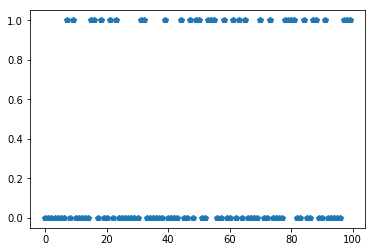

In [9]:
import matplotlib.pyplot as plt
plt.plot(y_pred, "p")

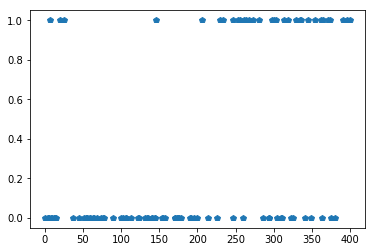

In [10]:
plt.plot(y_test, "p")

## Making the confusion Matrix

In [11]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[63,  5],
       [ 3, 29]], dtype=int64)

Correct predictions=63+29 <br>
Incorrect predictions=5+3

## Checking accuracy score

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.92

# Visualizing the Training set results

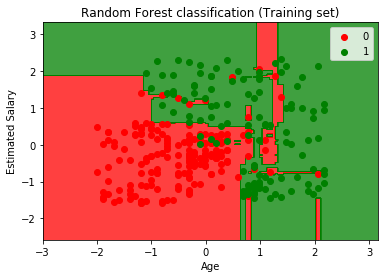

In [13]:
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('Random Forest classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

**There is over fitting in this model as red area on right shows. These points try to catch red data points for those user who didn't buy SUV but, this actually creates a plot with no regular shape or area. Instead it attempts to catch all possible value points. Against each user, we defined 10 trees. After computing, Alogorithm takes vote for all and based on that choose to draw our probability boundary**

# Visualizing the Test set results

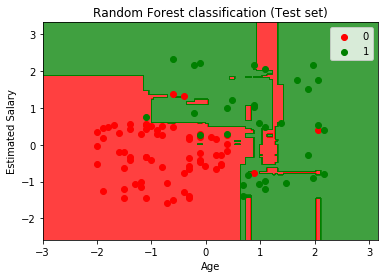

In [14]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('Random Forest classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()